<a href="https://colab.research.google.com/github/uk-zash/cat-vs-dog-/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 273MB/s]
100% 1.06G/1.06G [00:05<00:00, 210MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D , MaxPooling2D , Flatten , BatchNormalization , Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256 , 256)
)

Found 20000 files belonging to 2 classes.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256 , 256)
)

Found 5000 files belonging to 2 classes.


In [8]:
#Normalize

def process(image , label):
  image = tf.cast(image/255. , tf.float32)
  return image , label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [9]:

model = Sequential()

model.add(Conv2D(64 , kernel_size = (3,3) , padding = "valid" , activation = "relu" ,input_shape = (256 , 256 , 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2 , 2) , strides = 2 , padding = "valid"))

model.add(Conv2D(128 , kernel_size = (3 , 3) , padding = "valid" , activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2) , strides= 2 , padding = "valid"))

model.add(Conv2D(256 , kernel_size = (3 , 3) , padding = "valid" , activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2 ,2) , strides = 2 , padding = "valid"))


model.add(Flatten())
model.add(Dense(256 , activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(128 , activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(64 , activation = "relu"))
model.add(Dropout(0.1))

model.add(Dense(1 , activation= "sigmoid"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 230400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      58,982,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,396,481 (226.58 MB)

 Trainable params: 59,395,585 (226.58 MB)

 Non-trainable params: 896 (3.50 KB)

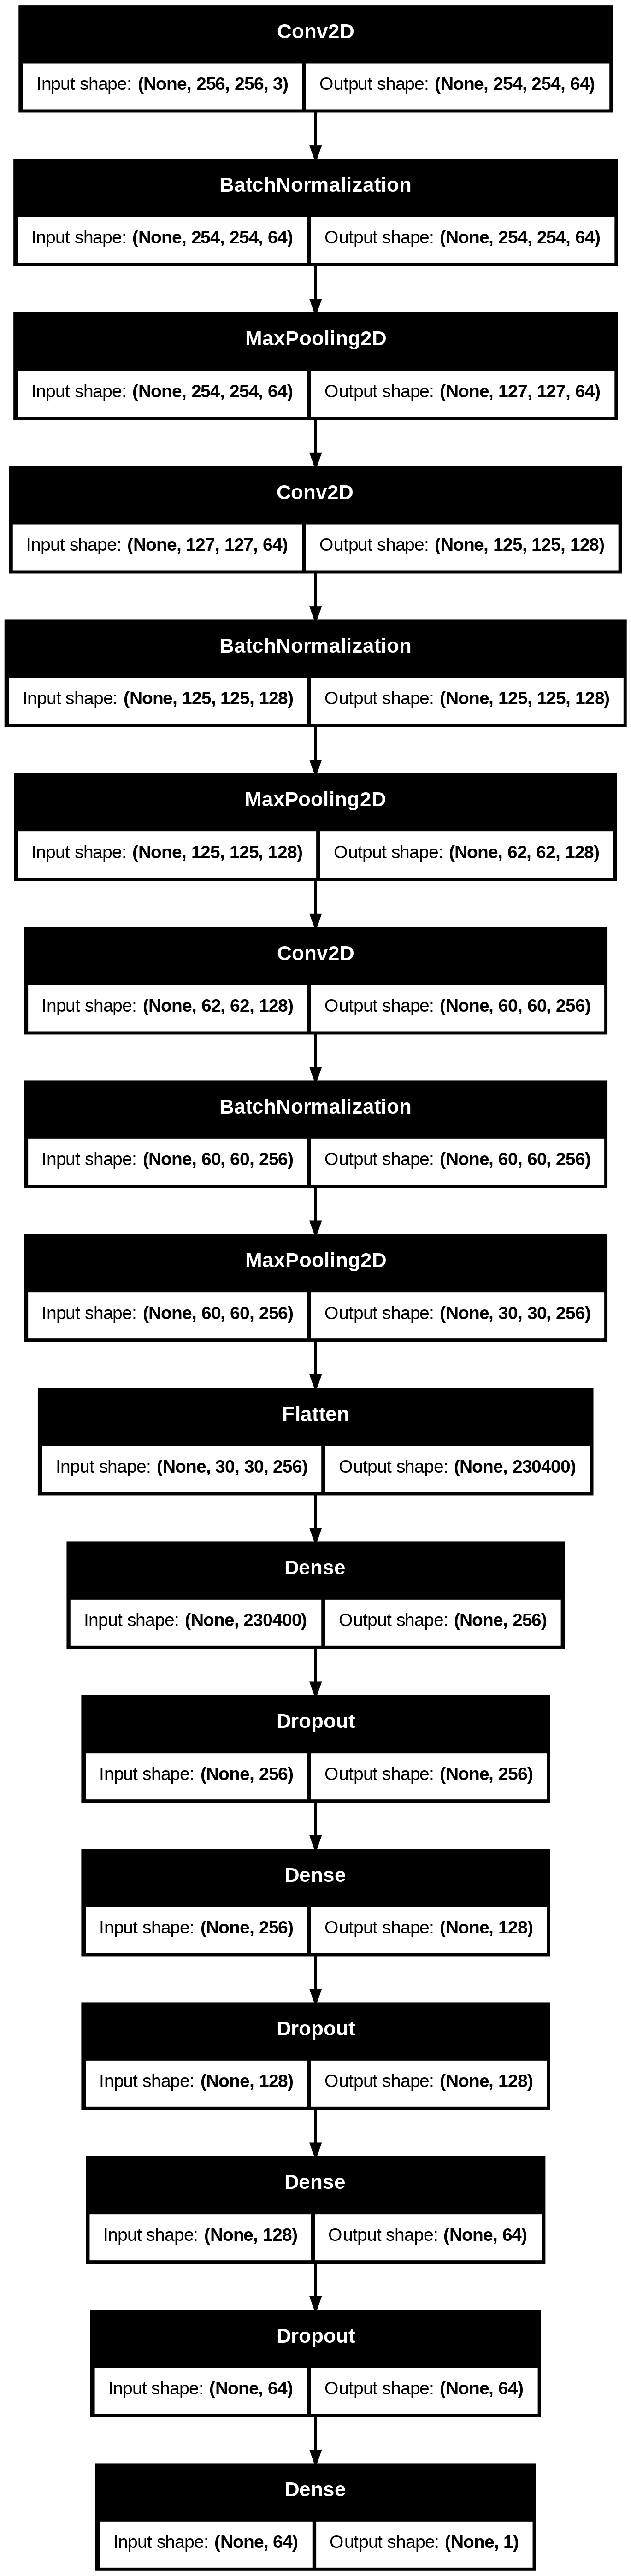

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model , show_shapes = True)

In [11]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

In [12]:
history = model.fit(train_dataset , epochs = 10 , validation_data = validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 175ms/step - accuracy: 0.5311 - loss: 4.7467 - val_accuracy: 0.6378 - val_loss: 0.6392
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.6238 - loss: 0.6494 - val_accuracy: 0.6138 - val_loss: 0.7325
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.6972 - loss: 0.5743 - val_accuracy: 0.6656 - val_loss: 0.6026
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.7464 - loss: 0.5182 - val_accuracy: 0.7122 - val_loss: 0.5590
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.7959 - loss: 0.4471 - val_accuracy: 0.7554 - val_loss: 0.4940
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 164ms/step - accuracy: 0.8240 - loss: 0.3872 - val_accuracy: 0.7416 - val_loss: 0.5659
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 167ms/step - accuracy: 0.8585 - loss: 0.3254 - val_accuracy: 0.8002 - val_loss: 0.4493
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 164ms/step - accuracy: 0.9055 -

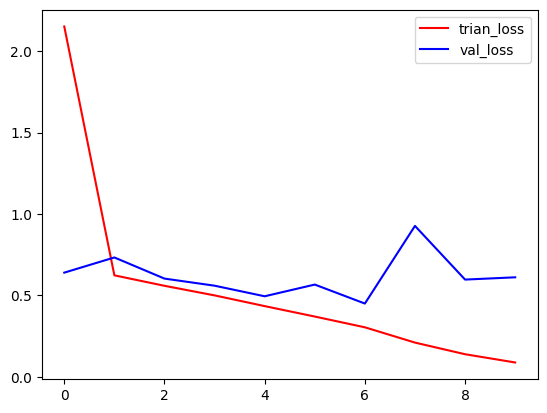

In [13]:
plt.plot(history.history["loss"] , color = "red" , label = "trian_loss")
plt.plot(history.history["val_loss"] , color = "blue" , label = "val_loss")
plt.legend()
plt.show()

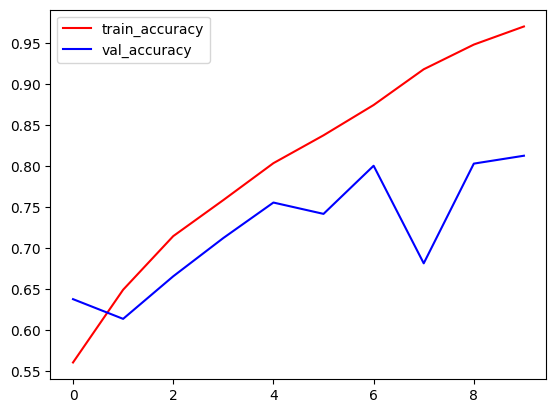

In [14]:
plt.plot(history.history["accuracy"] , color = "red" , label = "train_accuracy")
plt.plot(history.history["val_accuracy"] , color = "blue" , label = "val_accuracy")
plt.legend()
plt.show()

In [16]:
#Data Augementation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:

data_gen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2 ,
    horizontal_flip = True ,
    width_shift_range = 0.2 ,
    height_shift_range  = 0.2 ,
    fill_mode = "nearest"
)

test_gen = ImageDataGenerator(
    rescale = 1./255
)

In [18]:
augmented_training_dataset = data_gen.flow_from_directory(
    directory = "/content/train",
    target_size = (256 , 256 ),
    batch_size = 32,
    shuffle = True ,
    class_mode = "binary"
)

augmented_validation_dataset = test_gen.flow_from_directory(
    directory = "/content/test",
    target_size = (256 , 256),
    batch_size = 32 ,
    shuffle = True ,
    class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_accuracy" , patience = 5 , restore_best_weights = True)

In [26]:
history = model.fit(
    augmented_training_dataset ,
    epochs = 10 ,
    steps_per_epoch= len(augmented_training_dataset)//32,
    validation_data = augmented_validation_dataset,
    validation_steps = len(augmented_validation_dataset)//32,
    callbacks = [early_stopping]

)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 621ms/step - accuracy: 0.7981 - loss: 0.4609 - val_accuracy: 0.7031 - val_loss: 0.5288
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - accuracy: 0.8038 - loss: 0.4609 - val_accuracy: 0.6953 - val_loss: 0.5447
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.7415 - loss: 0.5387 - val_accuracy: 0.7422 - val_loss: 0.5106
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 588ms/step - accuracy: 0.8034 - loss: 0.4943 - val_accuracy: 0.8438 - val_loss: 0.3636
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 559ms/step - accuracy: 0.7816 - loss: 0.4680 - val_accuracy: 0.8281 - val_loss: 0.3704
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step - accuracy: 0.7460 - loss: 0.5137 - val_accuracy: 0.8359 - val_loss: 0.3643
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 586ms/step - accuracy: 0.7699 - loss: 0.4771 - val_accuracy: 0.8750 - val_loss: 0.3852
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 12s 653ms/step - accuracy: 0.7986 - loss: 0.4268 - val_accur

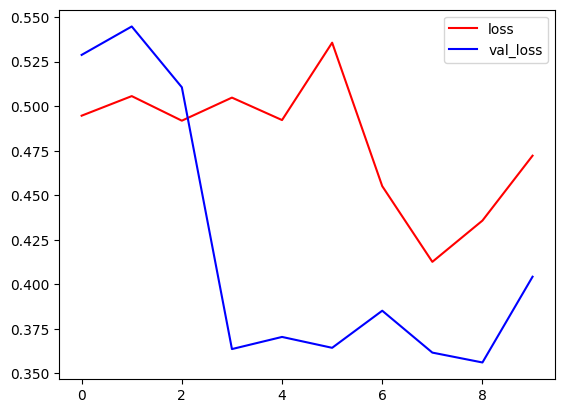

In [27]:
plt.plot(history.history["loss"] , color = "red" , label ="loss")
plt.plot(history.history["val_loss"] , color = "blue" , label = "val_loss")
plt.legend()
plt.show()

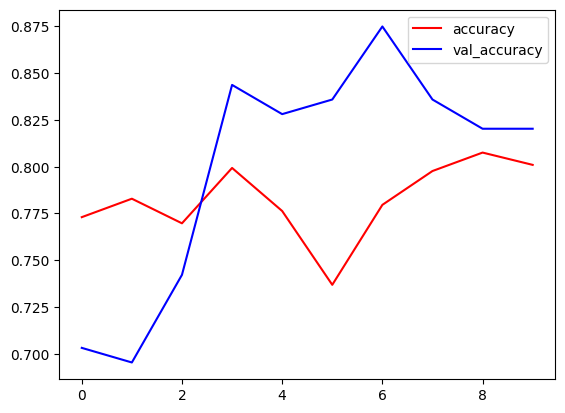

In [28]:
plt.plot(history.history["accuracy"] , color = "red" , label ="accuracy")
plt.plot(history.history["val_accuracy"] , color = "blue" , label = "val_accuracy")
plt.legend()
plt.show()

In [29]:
import cv2


In [54]:
dog_image = cv2.imread("/content/dog-3277416_1280.jpg")

In [55]:
dog_image = cv2.cvtColor(dog_image , cv2.COLOR_BGR2RGB)

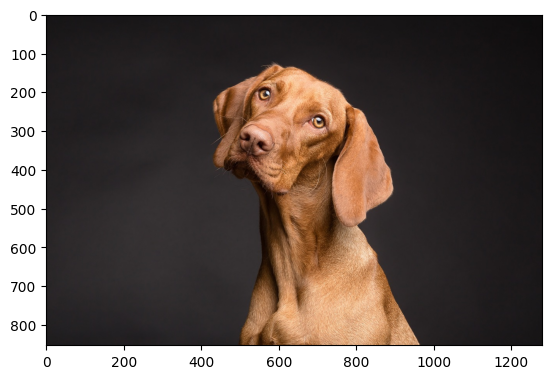

In [33]:
plt.imshow(dog_image)

In [56]:
dog_image = cv2.resize(dog_image , (224 , 224))

In [37]:
dog_image = dog_image.reshape(1 , 256 , 256 , 3)

In [38]:
model.predict(dog_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[1.]], dtype=float32)

Using Pretrained Model

In [39]:

from keras.applications.vgg16 import VGG16


In [40]:
model = VGG16()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [41]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
dog_image = dog_image.reshape(1, 224 , 224 , 3)

In [58]:
from tensorflow.keras.applications.vgg16 import preprocess_input , decode_predictions

dog_image = preprocess_input(dog_image)

In [60]:
decode_predictions(model.predict(dog_image))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02100583', 'vizsla', 0.9945958),
  ('n02092339', 'Weimaraner', 0.001976471),
  ('n02087394', 'Rhodesian_ridgeback', 0.0018384298),
  ('n02090379', 'redbone', 0.00061879744),
  ('n02088466', 'bloodhound', 0.0004559268)]]

In [68]:
cat_image = cv2.imread("/content/cat-551554_1280.jpg")

In [71]:
cat_image = cv2.resize(cat_image , (224 , 224))
cat_image = cv2.cvtColor(cat_image , cv2.COLOR_BGR2RGB)

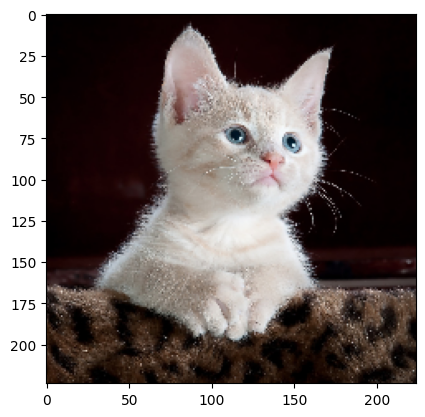

In [72]:
plt.imshow(cat_image)

In [73]:
cat_image = cat_image.reshape(1 , 224 ,224 , 3)

In [74]:
cat_image = preprocess_input(cat_image)

In [76]:
decode_predictions(model.predict(cat_image) , top = 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[[('n02124075', 'Egyptian_cat', 0.36381653),
  ('n02123045', 'tabby', 0.32994682)]]